TypeError: 'Axes' object is not iterable

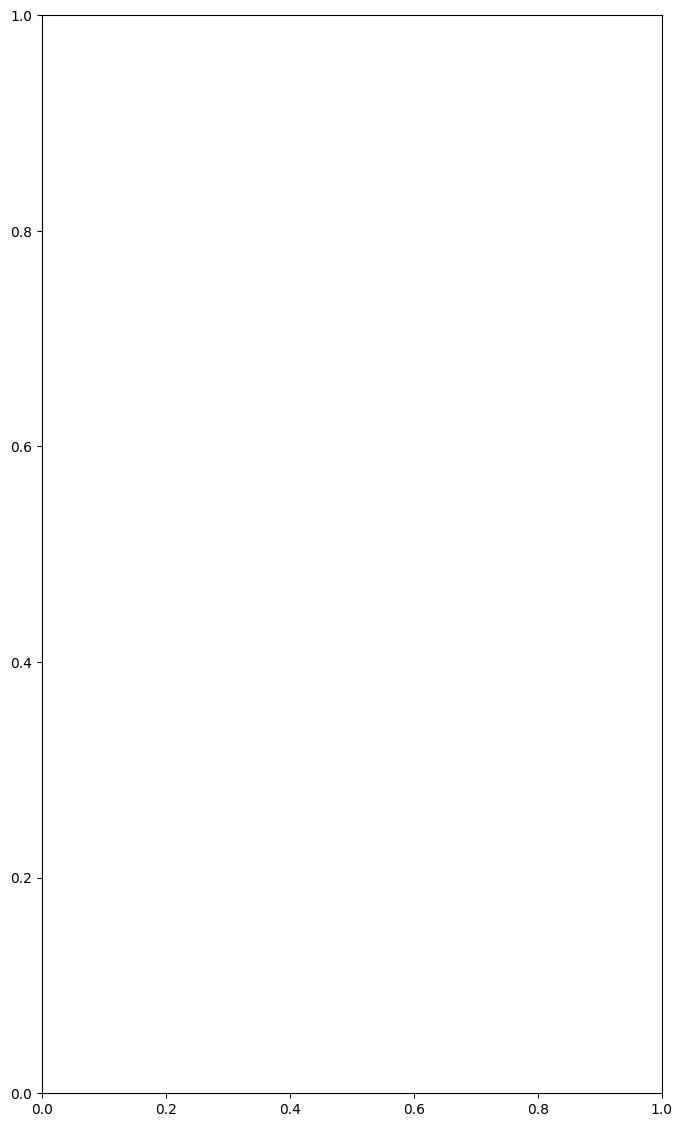

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define multiple similarity_weight functions
def weight_exp_bell(x):
    return np.exp(-5 * (x - 0.5)**2)

def weight_u_shape_quad(x):
    return (1 - np.abs(x - 0.5) * 2) ** 2

def weight_abs_quad(x):
    return np.abs(x - 0.5) ** 2

def weight_u_shape_cubic(x):
    return np.clip((np.abs(x - 0.5) * 2) ** 3, 1e-3, None)

def weight_linear(x):
    return np.abs(x - 0.5) * 2

def weight_inverted_gaussian(x, k=10):
    return 1 - np.exp(-k * (x - 0.5)**2)

# x values between 0 and 1
x = np.linspace(0, 1, 200)

# List of functions and labels to plot separately as subplots
functions = [
    (weight_abs_quad, "Abs quad (low center)"),
    (weight_u_shape_cubic, "Cubic U-shape (strong edges)"),
    (weight_linear, "Linear (edges weighted)"),
    (weight_inverted_gaussian, "Inverted Gaussian (edges weighted)")
]

# Create subplots
fig, axes = plt.subplots(len(functions), 1, figsize=(8, 14), sharex=True)

for ax, (func, label) in zip(axes, functions):
    y = func(x)
    ax.plot(x, y, color='tab:blue')
    ax.set_title(label)
    ax.grid(True)
    ax.set_ylim(-0.05, 1.05)

# Common labels
fig.text(0.5, 0.04, 'Sleep Similarity', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Weight', va='center', rotation='vertical', fontsize=12)
fig.suptitle("Comparison of Similarity Weight Functions (including Inverted Gaussian)", fontsize=16, y=0.95)

plt.tight_layout(rect=[0.03, 0.05, 1, 0.93])
plt.show()

# Also plot all on one figure for direct comparison
weights = {
    "Abs quad (low center)": weight_abs_quad(x),
    "Cubic U-shape (strong edges)": weight_u_shape_cubic(x),
    "Linear (edges weighted)": weight_linear(x),
    "Inverted Gaussian": weight_inverted_gaussian(x)
}

plt.figure(figsize=(10, 6))
for label, y in weights.items():
    plt.plot(x, y, label=label)

plt.title("Comparison of Similarity Weight Functions")
plt.xlabel("Sleep Similarity")
plt.ylabel("Weight")
plt.legend()
plt.grid(True)
plt.show()


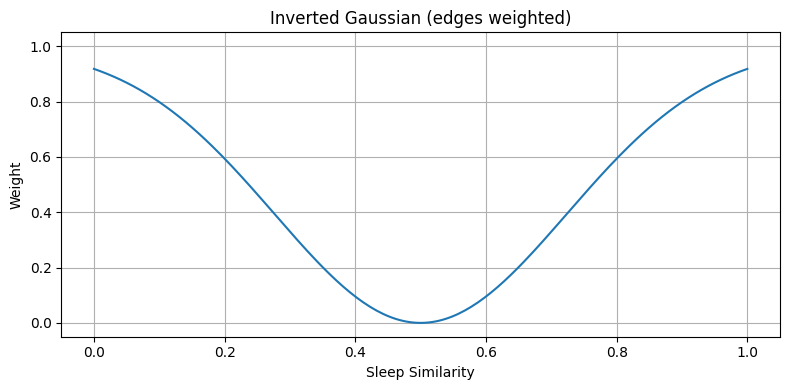

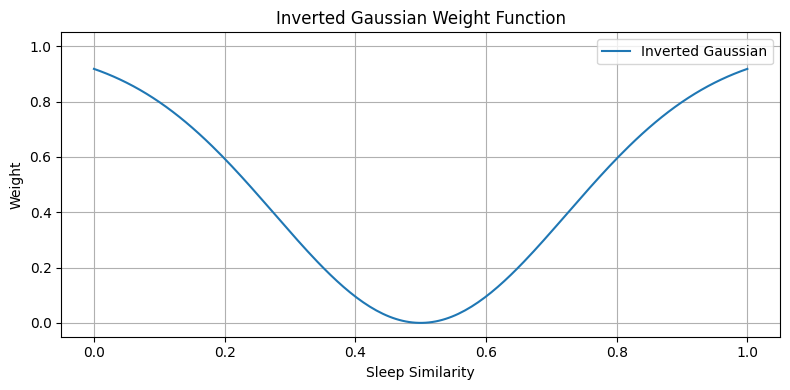

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Inverted Gaussian weight function
def weight_inverted_gaussian(x, k=10):
    return 1 - np.exp(-k * (x - 0.5)**2)

# x values between 0 and 1
x = np.linspace(0, 1, 200)

# Compute inverted Gaussian weights
y = weight_inverted_gaussian(x)

# Plot as a single function (subplot style)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, color='tab:blue')
ax.set_title("Inverted Gaussian (edges weighted)")
ax.set_xlabel("Sleep Similarity")
ax.set_ylabel("Weight")
ax.set_ylim(-0.05, 1.05)
ax.grid(True)
plt.tight_layout()
plt.show()

# Plot again as standalone figure (same data, optional)
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Inverted Gaussian", color='tab:blue')
plt.title("Inverted Gaussian Weight Function")
plt.xlabel("Sleep Similarity")
plt.ylabel("Weight")
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def stratified_sample_df(df, col):
    # Get the size of the smallest group
    min_count = df[col].value_counts().min()

    # Sample min_count rows from each group
    samples = (
        df.groupby(col)
        .apply(lambda x: x.sample(n=min_count, random_state=1))
        .reset_index(drop=True)
    )

    return samples

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_ecdf(sample, label=None):
    if len(sample) > 0:
        sns.ecdfplot(sample, label=label)
        if label:
            plt.legend()
        
        
event_types = ["Pain", "Sleep", "Excretion", "Eating", "Family"]
df_both["Event_Name_dictionary_multi"] = df_both["Event_Name_dictionary"].apply(lambda x: {i: x.count(i) if isinstance(x, list) else 0 for i in event_types})
df_both["focus_event"]=""

disagreement_1_list = []
disagreement_2_list = []
agreement_1_list = []
agreement_2_list = []
for selected_event_type in event_types:
    print(selected_event_type)
    df_both[f'w_{selected_event_type}_kewyword'] = df_both["Event_Name_dictionary_multi"].apply(lambda x: True if ( (x[selected_event_type] >= 1)) else False)
    df_both[f'wo_{selected_event_type}_kewyword_excluding_unknown'] = df_both["Event_Name_dictionary_multi"].apply(lambda x: True if (( x[selected_event_type] == 0) and (sum(x.values())!=0)) else False)
    df_both[f'wo_{selected_event_type}_kewyword_including_unknown'] = df_both["Event_Name_dictionary_multi"].apply(lambda x: True if (( x[selected_event_type] == 0)) else False)
    for threshold in ["0_2"]:
        th = float(threshold.replace("_","."))
        disagreement1 = df_both[df_both[f'w_{selected_event_type}_kewyword']  & (df_both[f"{selected_event_type}_similarity"] < th)] #10
        disagreement1.loc[:,'focus_event'] = selected_event_type
        disagreement2 = df_both[df_both[f'wo_{selected_event_type}_kewyword_excluding_unknown'] & (df_both[f"{selected_event_type}_similarity"] >= th)] #01
        disagreement2.loc[:,'focus_event'] = selected_event_type
        agreement1 = df_both[df_both[f'w_{selected_event_type}_kewyword'] & (df_both[f"{selected_event_type}_similarity"] >= th)] #11
        agreement1.loc[:,'focus_event'] = selected_event_type
        agreement2 = df_both[df_both[f'wo_{selected_event_type}_kewyword_including_unknown']  & (df_both[f"{selected_event_type}_similarity"] < th)] #00
        agreement2.loc[:,'focus_event'] = selected_event_type        
        disagreement_1_list.append(disagreement1)
        disagreement_2_list.append(disagreement2)    
        agreement_1_list.append(agreement1)
        agreement_2_list.append(agreement2)         
disagreement1_df = pd.concat(disagreement_1_list)    
disagreement2_df = pd.concat(disagreement_2_list)
agreement1_df = pd.concat(agreement_1_list)    
agreement2_df = pd.concat(agreement_2_list) 
all_df = pd.concat([disagreement1_df, disagreement2_df, agreement1_df, agreement2_df.sample(1000)],ignore_index=True)
print(len(disagreement1_df.UID.unique()), len(disagreement2_df.UID.unique()), len(agreement1_df.UID.unique()), len(agreement2_df.UID.unique()), len(all_df.UID.unique()))
print(len(disagreement1_df), len(disagreement2_df), len(agreement1_df), len(agreement2_df), len(all_df))
# agreement1_df[agreement1_df.focus_event=="Sleep"].drop_duplicates(subset=['focus_event','UID']).reset_index()["Keyword"].value_counts()
# agreement1_df_sleep= agreement1_df[agreement1_df.focus_event=="Sleep"].Sentence_dictionary.apply(lambda x: len(x.split(' '))).hist()



In [4]:
import pandas as pd
notes_selected = pd.read_pickle("../data/NOTEEVENTS_NURSINGNOTES_REMOVED_ERROR_STRINGS_FILLED_ABBREVIATIONS.pkl")
notes_selected['text'] = notes_selected.TEXT.apply(lambda x: x.lower())

In [15]:
notes_selected[notes_selected.text.apply(lambda x:  'allerg' in x and 'acetamino' in x)]['text'].tolist()

['asthma\n   assessment:\n   wheezes on adm which were ins and exp which are now fine exp. r/a\n   sao2>90%,  able to tol more activity with out becoming sob.\n   action:\n   patient was placed on multiple meds, including advair discus, flut9icasone\n   propionate nasal spray, allegro, singular, topiramate, mesalamine\n   ,methylprednisolone and benzonatate. patient remained on r/a after the cont\n   nebs were stopped but did receive pro re nata nebs.\n   response:\n   patient wheezes are now fine. increased act tol. no acute resp distress\n   noted.\n   plan:\n   cont on nebs and meds. [**name (ni) **] patient to limit act. monitor sao2 and provide\n   supplemental o2 if needed.\n   this patient was adm to the micu on [**2163-1-15**]. patient had not felt well with\n   cough which had progressively gotten worse and sob.  patient had seen her\n   pcp and was placed on prednisone and levofloxacin which did not help.\n   came to the ew where she was noted to have a very bad cough and sob

In [138]:

import pandas as pd
import json

def fix_event(x):
    if x["event"] != "Unknown":
        return x
    x = x.copy()  # avoid modifying original
    try:
        raw = x.get("raw_output", "")
        if isinstance(raw, str):
            parsed = json.loads(raw)
            fields = parsed.keys()
            common_to_labels = set(fields).intersection(set(["Unknown", "Eating", "Sleep", "Excretion", "Family", "Pain"])) 
            if "event_type" in fields:
                x["event"] = parsed.get("event_type")
            elif "event type" in fields:
                x["event"] = parsed.get("event type")
            elif len(common_to_labels) > 0:
                x["event"] = list(common_to_labels)
            else:
                x["event"] = "Unknown"
        else:
            x["event"] = "Unknown"
    except (json.JSONDecodeError, TypeError):
        x["event"] = "Unknown"
    return x

def get_keyword(x, event_type="Sleep"):
    x = x.copy()  # avoid modifying original
    try:
        raw = x.get("raw_output", "")
        if isinstance(raw, str):
            parsed = json.loads(raw)
            fields = parsed.keys()
            common_to_labels = set(fields).intersection(set(["Unknown", "Eating", "Sleep", "Excretion", "Family", "Pain"])) 
            if "keyword" in fields:
                x["keyword"] = parsed.get("keyword")
                if type(x["keyword"]) == dict:
                    if event_type in x["keyword"]:
                        x["keyword"] = x["keyword"][event_type]
                    else:
                        x["keyword"] = "Unknown"
            elif "keywords" in fields:
                x["keyword"] = parsed.get("keywords")
                if type(x["keyword"]) == dict:
                    if event_type in x["keyword"]:
                        x["keyword"] = x["keyword"][event_type]
                    else:
                        x["keyword"] = "Unknown"
            elif event_type in fields:
                x["keyword"] = parsed.get(event_type)
            else:
                x["keyword"] = "Unknown"
        else:
            x["keyword"] = "Unknown"
    except (json.JSONDecodeError, TypeError):
        x["keyword"] = "Unknown"
    return x["keyword"]

from glob import glob
files = glob("../exports/llm/*/*True*phrase*.pkl")
for file in files:
    df = pd.read_pickle(file)
    # for i in range(3):
    #     print(f"File: {file}")
    #     print("Keyword:", df["LLM_Events_no_evidence"].iloc[i]['keyword'])
    #     print("Raw output:", df["LLM_Events_no_evidence"].iloc[i]['raw_output'])
    llm_models = ['LLM_Events_no_evidence','LLM_Events_dict_evidence','LLM_Events_embedder_evidence','LLM_Events_all_evidence']
    for model in llm_models:
        df[f"{model}_cleaned"] = df[model].apply(lambda x: get_keyword(x, "Sleep"))
        print([(i, "->",j) for (i, j) in zip(df[model].iloc[:10], df[f"{model}_cleaned"].iloc[:10])])

    # df.to_pickle(file)



[({'sentence': '2mg ivp given as well as percocet for c/o of r fem leg discomfort and ambien for sleep/anxiety and settled back to sleep with gradual relief of discomfort/sob within 10min', 'event': 'Unknown', 'keyword': '', 'phrase': '', 'raw_output': '{\n  "Pain": {\n    "Pain": ["c/o of r fem leg discomfort", "discomfort"]\n  },\n  "Sleep": {\n    "Sleep": ["ambien for sleep/anxiety", "settled back to sleep"]\n  }\n}', 'attributes': {}, 'event_name_prompt': 'Given the sentence: 2mg ivp given as well as percocet for c/o of r fem leg discomfort and ambien for sleep/anxiety and settled back to sleep with gradual relief of discomfort/sob within 10min. \n            and the following event types: {\'Eating\': \'The patient takes food into their body by mouth.\', \'Excretion\': \'The patient discharges waste matter from their body.\', \'Family\': \'The patient has a visit, call, or communication with a family member.\', \'Pain\': \'The patient reports or shows signs of pain.\', \'Sleep\':

In [145]:
df['LLM_Events_dict_evidence'].apply(lambda x: get_keyword(x, "Sleep")).iloc[:]

0         sleep
1       Unknown
2       Unknown
3       Unknown
4       Unknown
         ...   
347    sleeping
348     Unknown
349    sleeping
350         nap
351       sleep
Name: LLM_Events_dict_evidence, Length: 352, dtype: object

NameError: name 'LLM_Events_no_evidence_Sleep' is not defined

{'sentence': '2 other brothers and a sister, and is not married and unemployed at this time',
 'event': 'Family',
 'keyword': '',
 'phrase': '',
 'raw_output': '{"event type":"Family"}',
 'attributes': {},
 'event_name_prompt': 'Given the sentence: 2 other brothers and a sister, and is not married and unemployed at this time. \n            and the following event types: {\'Eating\': \'The patient takes food into their body by mouth.\', \'Excretion\': \'The patient discharges waste matter from their body.\', \'Family\': \'The patient has a visit, call, or communication with a family member.\', \'Pain\': \'The patient reports or shows signs of pain.\', \'Sleep\': \'The patient is sleeping, or the sleep’s quality or quantity is described.\', \'Unknown\': \'choose "Unknown" if none of the other event type are applicable.\'} \n            choose the most relevant event type(s) for the sentence.\n            \n            \n            Output ONLY a JSON: {{"event type":<chosen event type>}}

In [86]:

old_file = glob("../exports/groundtruth/Annotated/Sleep_*.xlsx")[0]
df_old = pd.read_excel(old_file)
new_file = glob("../exports/groundtruth/Annotating/Sleep_*.xlsx")[0]
df_new = pd.read_excel(new_file)
print(df_old.gt_Sleep.value_counts(),df_new.gt_Sleep.value_counts())
uid_to_gt_label = {uid:gt_sleep for (uid,gt_sleep) in zip(df_old['UID'],df_old['gt_Sleep'])}
uid_to_good = {uid:good for (uid,good) in zip(df_old['UID'],df_old['good_example'])}
uid_to_comments = {uid:comment for (uid,comment) in zip(df_old['UID'],df_old['Comments'])}
df_new['gt_Sleep'] = df_new['UID'].apply(lambda x: uid_to_gt_label.get(x,None))
df_new['good_example'] = df_new['UID'].apply(lambda x: uid_to_good.get(x,False))
df_new['Comments'] = df_new['UID'].apply(lambda x: uid_to_comments.get(x,None))
print(df_new.good_example.value_counts(dropna=False))
df_new.to_excel(new_file.replace(".xlsx","_enriched.xlsx"),index=False)

gt_Sleep
0    254
1    134
Name: count, dtype: int64 gt_Sleep
False    354
Name: count, dtype: int64
good_example
False    352
True       2
Name: count, dtype: int64


In [84]:
df_old.Comments.value_counts(dropna=False)

Comments
NaN                                                                                                                             364
high similarity score eventhough nothing to do with sleep                                                                         4
requesting "sleep" medicine is not sleep                                                                                          1
explaining about "sleep" apnea is not sleep                                                                                       1
requesting sleep meds                                                                                                             1
Sleep had occurred in the past. This is a reference.                                                                              1
sleep med                                                                                                                         1
medical history                                                    

gt_Sleep
NaN    271
0.0     66
1.0     17
Name: count, dtype: int64

In [72]:
sum([df_new.UID[i] in uid_to_gt_label for i in range(300)])

60

In [94]:
df_extended = pd.read_excel("../exports/groundtruth/Annotating/Sleep_132_222_enriched.xlsx")
df_extended[df_extended.gt_Sleep.isna()]

,UID,ROW_ID,Sent_ID,HADM_ID,CHARTTIME_dictionary,STORETIME_dictionary,Sentence_dictionary,Event_Name_dictionary,Keyword,Lemma,...,Time_biolord,Event_Name_dictionary_multi,Event_Name_dictionary_bkp,Keyword_bkp,Lemma_bkp,sampling_weight,is_keyword_present,gt_Sleep,good_example,Comments


In [4]:
import pandas as pd
dictionary_file_1 = "../resources/keyword_dict_annotated_iter2.xlsx"
dictionary_file_2 = "../resources/keyword_dict_annotated.xlsx"
df_dict_1 = pd.read_excel(dictionary_file_1)
df_dict_2 = pd.read_excel(dictionary_file_2)

# Find differences
diff_1_not_in_2 = df_dict_1[~df_dict_1.isin(df_dict_2.to_dict(orient='list')).all(axis=1)]
diff_2_not_in_1 = df_dict_2[~df_dict_2.isin(df_dict_1.to_dict(orient='list')).all(axis=1)]

print("Entries in dictionary_file_1 but not in dictionary_file_2:")
print(diff_1_not_in_2.label.tolist())

print("\nEntries in dictionary_file_2 but not in dictionary_file_1:")
print(diff_2_not_in_1)

label_dict1 = {label:positive for label,positive in zip()}
# for label

Entries in dictionary_file_1 but not in dictionary_file_2:
['diuresis', 'lasix_x', 'small inc', 'use_urinal', 'pass_stool', 'void_pass', 'void']

Entries in dictionary_file_2 but not in dictionary_file_1:
Empty DataFrame
Columns: [class, label, definition, example, positive]
Index: []
